In [1]:
from geojson import Feature, Point, FeatureCollection
from shapely.geometry import Polygon, LineString, LinearRing
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
%matplotlib inline
import shapely
import geojson
import subprocess
import folium
import pyproj

# conda install -c conda-forge mapclassify


from mpl_toolkits.axes_grid1 import make_axes_locatable



In [2]:
data = "data.geojson"
geodata = geojson.load(open(data))
# geodata

In [3]:
tmp_lists = []

for i in range(0, len(geodata['features'])):
    if i!=9:
        for j in range(0, len(geodata['features'][i]['geometry']["coordinates"])):
            if len(geodata['features'][i]['geometry']["coordinates"][j]) >= 3:
                tmp_lists.append(
                      {
                        'Slabel': geodata['features'][i]['properties']['Slabel'],
                        'Plabel': geodata['features'][i]['properties']['Plabel'],
                        'geometry' : Polygon(geodata['features'][i]['geometry']["coordinates"][j])
                       }
                    )
            else:
                pass
    else:
        pass

# len(geodata['features'][1]['geometry']["coordinates"][63])
# geodata['features'][1]['geometry']["coordinates"][63]

In [4]:
# tmp_lists

In [5]:

len(geodata['features'][12]['geometry']["coordinates"])
# geodata['features'][12]['geometry']["coordinates"][0]


# len(geodata['features'][9]['geometry']["coordinates"])


# geodata['features'][1]['geometry']["coordinates"][55]
# geodata['features'][2]['geometry']["coordinates"]

7

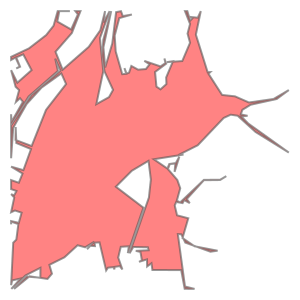

In [6]:
dat= Polygon(geodata['features'][9]['geometry']["coordinates"][0])

dat

In [7]:
gdf = gpd.GeoDataFrame(tmp_lists)

gdf.index = np.arange(1, len(gdf) + 1)

gdf = gdf.set_crs('epsg:32631')

# gdf

<AxesSubplot:>

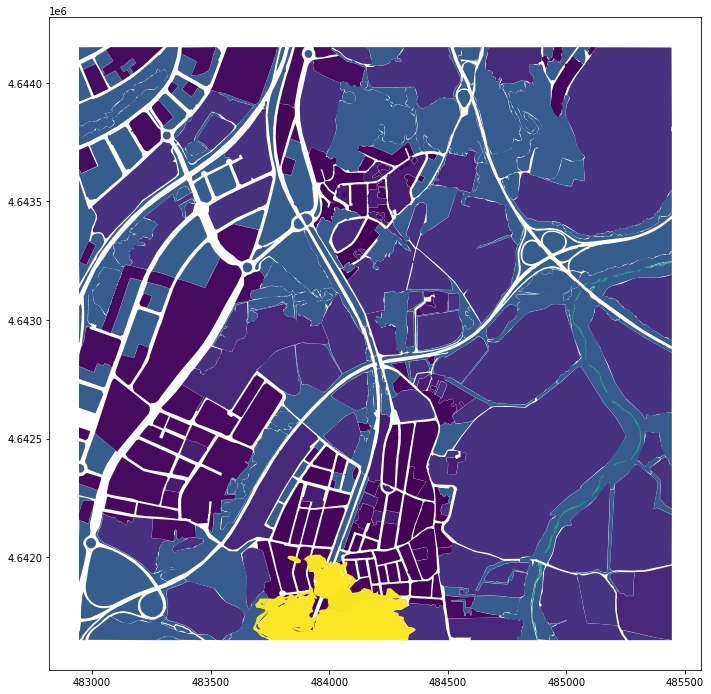

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

'''
used to plot the legend outside the map


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(column='Slabel', ax=ax, legend=True, cax=cax)
'''

gdf.plot(column='Slabel', ax=ax, )#cmap='OrRd', scheme='equal_interval')



In [9]:
thick_cld =  gdf.loc[(gdf["Slabel"] == 82)]
thin_cld =  gdf.loc[(gdf["Slabel"] == 81)]
# thin_cld

In [10]:
# thick_cld

<AxesSubplot:>

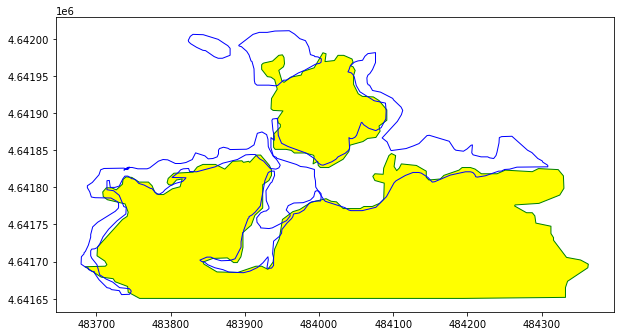

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
thick_cld.plot(ax=ax, color='yellow', edgecolor='green')
thin_cld.plot(ax=ax, color='None', edgecolor='blue', alpha=1)

<AxesSubplot:>

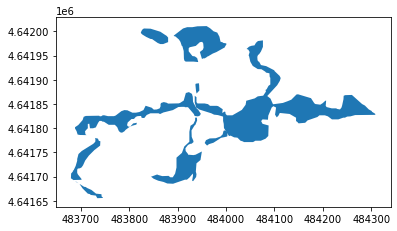

In [12]:
difference=gpd.overlay(thin_cld,thick_cld, how='difference')
# diff=gpd.overlay(thick_cld, thin_cld, how='difference')

difference.plot()

In [13]:
intersection=gpd.overlay(thin_cld,thick_cld, how='intersection')

# intersection.plot()

In [14]:
union=gpd.overlay(intersection,thick_cld, how='union')


union['common_column'] = 1
dissolved = union.dissolve(by='common_column')

# dissolved
# dissolved.plot()

In [15]:
new_thick_cld= dissolved.drop(['Slabel_1', 'Plabel_1', 'Slabel_2', 'Plabel_2'], axis=1)
# new_thick_cld

<AxesSubplot:>

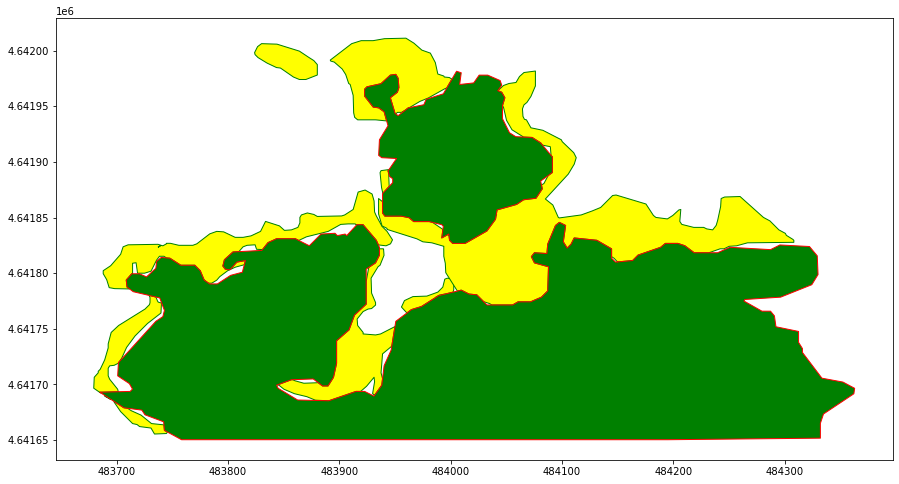

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 55))
difference.plot(ax=ax, color='yellow', edgecolor='green')
new_thick_cld.plot(ax=ax, color='green', edgecolor='red', alpha=1)
# thick_cld.plot(ax=ax, color='None', edgecolor='red', alpha=1)

In [17]:
# gdf.to_file('example.geojson')
# gdf.to_file('examp.shp')

In [18]:
# converting projections
wgs84 = pyproj.Proj(projparams = 'epsg:4326')
InputGrid = pyproj.Proj(projparams = 'epsg:32631')


x1, y1 = 483742.781,4641824.138
lat, lon = pyproj.transform(InputGrid, wgs84, x1, y1)

# dat2= 'example.geojson'
# geo = geojson.load(open(dat2))

# m = folium.Map(location = [lat, lon], tiles = "OpenStreetMap", zoom_start = 9)
# folium.features.GeoJson(geo, name="geojson", show=True).add_to(m)
# m


C:\Users\jben8\AppData\Local\Temp/ipykernel_15648/1083128452.py:7: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lat, lon = pyproj.transform(InputGrid, wgs84, x1, y1)


<AxesSubplot:>

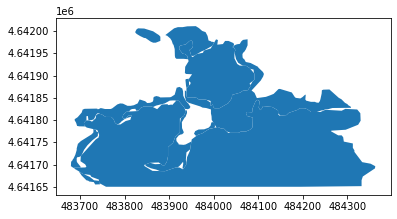

In [19]:
new_cloud = difference.append(thick_cld)
new_cloud.plot()

<AxesSubplot:>

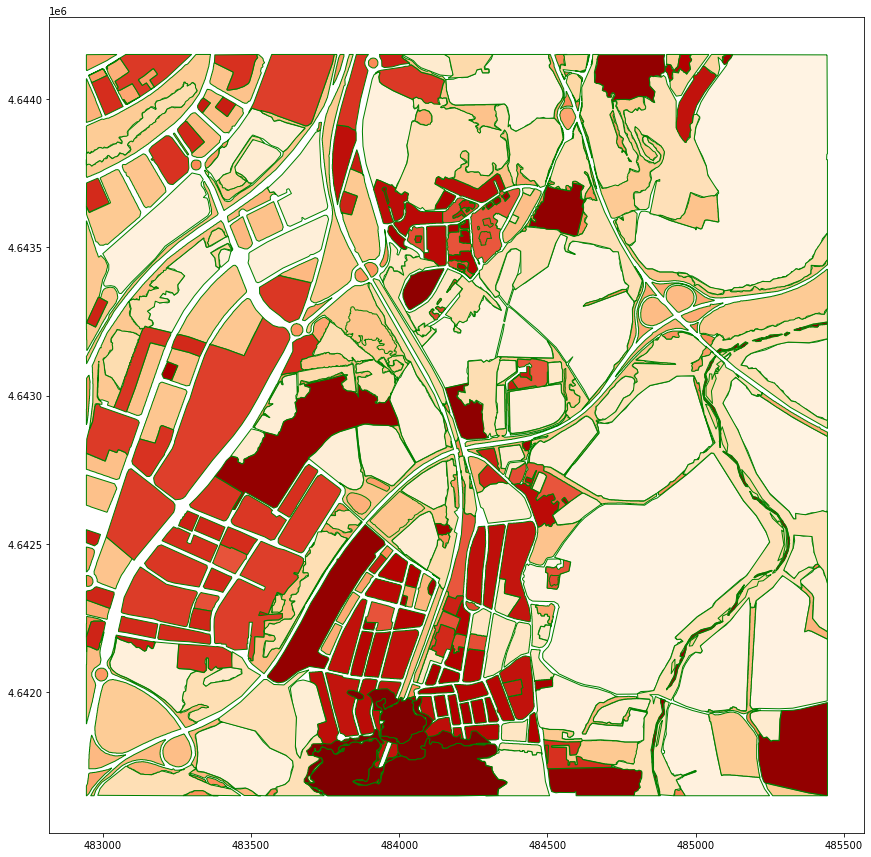

In [20]:
# creating a copy of the new data frame
gdf_copy = gdf

# droping rows that have overlays
gdf_copy = gdf_copy.drop([525,526,527,528,529]) 

# adding the new cleaned cloud to the origibal data frame
new_gdf = gdf_copy.append(new_cloud)


# new_gdf

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
new_gdf.plot(ax=ax, color='yellow', edgecolor='green', cmap='OrRd', alpha=1) # column='Slabel', scheme='equal_interval'

<AxesSubplot:>

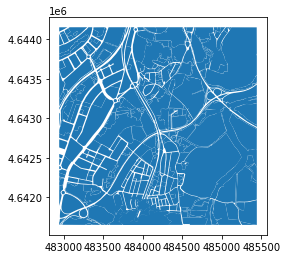

In [24]:
new_gdf.plot()

In [25]:
new_gdf.to_file("sample.geojson", driver='GeoJSON')


In [21]:
# new_full_gdf.to_file('exam.geojson', driver='GeoJSON')
# new_full_gdf.to_file('exam.shp')

In [22]:
shp = gpd.read_file('data.shp')
# shp

DriverError: data.shp: No such file or directory

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(15, 15))
# shp.plot(column='Slabel', ax=ax)
# shp.plot( ax=ax, color='yellow', edgecolor='green', alpha=1)

In [ ]:
roads =  shp.loc[(shp["Slabel"] == 14)]
# roads.plot()